In [1]:
import Plots
import NBodySimulator
import StaticArrays
import HTTP
import CSV

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


In [79]:
const G = 6.67408e-11 # kg^-1 m^3 s^-2
const t0 = 2458976.500000000 # A.D. 2020-May-07 00:00:00.0000 TDB (units = Earth days)
const au = 1.49597870700e11 # m/au
const day = 86400.0 # s/day
mutable struct body
    b
    r
    c
end

Sun mass data from https://en.wikipedia.org/wiki/Sun
Planet mass data from https://ssd.jpl.nasa.gov/?planet_phys_par
Position data from https://ssd.jpl.nasa.gov/horizons.cgi#results

In [80]:
function pdata(command, mass)
    v = Vector{Float64}(undef,6)
    r = HTTP.request("GET", "https://ssd.jpl.nasa.gov/horizons_batch.cgi?" *
        "batch=1&MAKE_EPHEM='YES'&TABLE_TYPE='VECTORS'&START_TIME='2020-05-07'&" *
        "STOP_TIME='2020-12-30'&STEP_SIZE='30%20d'&CSV_FORMAT='YES'&" *
        "CENTER='@0'&COMMAND='" * command * "'")
    result = String(r.body)
    m = match(r"\$\$SOE\n([^\$]*)\$\$EOE\n", result)
    c = CSV.read(IOBuffer(m[1]), header=["JDTDB", "TDB", "X", "Y", "Z", "VX", "VY", "VZ", "LT", "RG", "RR"])
    for i in 3:8
        v[i-2] = c[1,i]*1000.0 # Convert km to m for first row
    end
    return(body(NBodySimulator.MassBody(
                StaticArrays.SVector(v[1], v[2], v[3]),
                StaticArrays.SVector(v[4], v[5], v[6]), 
                mass), result, c))
end
sun = pdata("10", 1988500e24)
mercury = pdata("199", 0.330114e24)
venus = pdata("299", 4.86747e24)
earth = pdata("399", 5.97237e24)
mars = pdata("499", 0.641712e24)
jupiter = pdata("599", 1898.187e24)
saturn = pdata("699", 568.336e24)
uranus = pdata("799", 86.8127e24)
neptune = pdata("899", 102.4126e24)
pluto = pdata("999", 0.013030e24)

thread = 1 warning: parsed expected 11 columns, but didn't reach end of line on data row: 1. Ignoring any extra columns on this row
thread = 1 warning: parsed expected 11 columns, but didn't reach end of line on data row: 2. Ignoring any extra columns on this row
thread = 1 warning: parsed expected 11 columns, but didn't reach end of line on data row: 3. Ignoring any extra columns on this row
thread = 1 warning: parsed expected 11 columns, but didn't reach end of line on data row: 4. Ignoring any extra columns on this row
thread = 1 warning: parsed expected 11 columns, but didn't reach end of line on data row: 5. Ignoring any extra columns on this row
thread = 1 warning: parsed expected 11 columns, but didn't reach end of line on data row: 6. Ignoring any extra columns on this row
thread = 1 warning: parsed expected 11 columns, but didn't reach end of line on data row: 7. Ignoring any extra columns on this row
thread = 1 warning: parsed expected 11 columns, but didn't reach end of line

thread = 1 warning: parsed expected 11 columns, but didn't reach end of line on data row: 1. Ignoring any extra columns on this row
thread = 1 warning: parsed expected 11 columns, but didn't reach end of line on data row: 2. Ignoring any extra columns on this row
thread = 1 warning: parsed expected 11 columns, but didn't reach end of line on data row: 3. Ignoring any extra columns on this row
thread = 1 warning: parsed expected 11 columns, but didn't reach end of line on data row: 4. Ignoring any extra columns on this row
thread = 1 warning: parsed expected 11 columns, but didn't reach end of line on data row: 5. Ignoring any extra columns on this row
thread = 1 warning: parsed expected 11 columns, but didn't reach end of line on data row: 6. Ignoring any extra columns on this row
thread = 1 warning: parsed expected 11 columns, but didn't reach end of line on data row: 7. Ignoring any extra columns on this row
thread = 1 warning: parsed expected 11 columns, but didn't reach end of line

body(NBodySimulator.MassBody{Float64,Float64}([1.997066918166823e12, -4.681409571358568e12, -7.673288605578279e10], [5108.123595140517, 965.9128797527617, -1569.300275625834], 1.303e22), "*******************************************************************************\n Revised: November 5, 2015          134340 Pluto                            999\n \n NOTE: Pre-computed solution PLU055/DE433; a fit to all available observations \n including New Horizons spacecraft encounter tracking.\n\n PHYSICAL DATA (updated 2018-Aug-15; Mc= Charon mass, radius is IAU 2009):\n  Mass x10^22 (kg)      = 1.307+-0.018    Volume, 10^10 km^3    = 0.697\n  GM (planet) km^3/s^2  = 869.33907803    Density (R=1195 km)   = 1.86 g/cm^3\n  GM 1-sigma, km^3/s^2  =   1.5           Surface gravity       = 0.611 m/s^2 \n  Vol. mean radius (km) = 1188.3+-1.6     Mass ratio (Mc/Mp)    = 0.117\n  Sidereal rot. period  = 153.29335198 h  Sid. rot. rat, rad/s  = 0.0000113856\n  Mean solar day, h     = 153.2820        Mean 

In [82]:
const timespan = (0.0, 3000.0*day)
const bodies = [ 
    sun.b, 
    mercury.b, 
    venus.b, 
    earth.b, 
    mars.b, 
    jupiter.b, 
    saturn.b, 
    uranus.b, 
    neptune.b, 
    pluto.b
]

system = NBodySimulator.GravitationalSystem(bodies, G)
simulation = NBodySimulator.NBodySimulation(system, timespan)
simresult = NBodySimulator.run_simulation(simulation)

N: 10
Timespan: (0.0, 2.592e8)
Boundary conditions: NBodySimulator.InfiniteBox{Float64}([-Inf, Inf, -Inf, Inf, -Inf, Inf])
Potentials: 
Gravitational:
	G:6.67408e-11
Time steps: 543
t: 0.0, 2.592e8


In [90]:
earth.c[:,3:8]

,X,Y,Z,VX,VY,VZ
,Float64,Float64,Float64,Float64,Float64,Float64
1,-1.0439e8,-1.08663e8,12828.7,21.1451,-20.5647,0.00206223
2,-3.8814e7,-1.4591e8,15676.7,28.3258,-7.58182,0.00185666
3,3.63006e7,-1.4647e8,16833.2,28.3785,7.14299,0.00105639
4,1.02202e8,-1.10402e8,16191.2,21.3649,20.0961,-3.18311e-5
5,1.42322e8,-4.65155e7,14153.1,8.88207,28.1414,-0.00104109
6,1.4602e8,2.93808e7,11481.6,-6.14738,29.1164,-0.00165524
7,1.11501e8,9.77991e7,9134.96,-19.9288,22.4436,-0.00166795
8,4.70661e7,1.40343e8,8035.87,-28.6502,9.58313,-0.0010259


┌ Info: Saved animation to 
│   fn = /Users/jason/workspace/space-simulator/inner.gif
└ @ Plots /Users/jason/.julia/packages/Plots/cc8wh/src/animation.jl:98


Plots.AnimatedGif("/Users/jason/workspace/space-simulator/inner.gif")
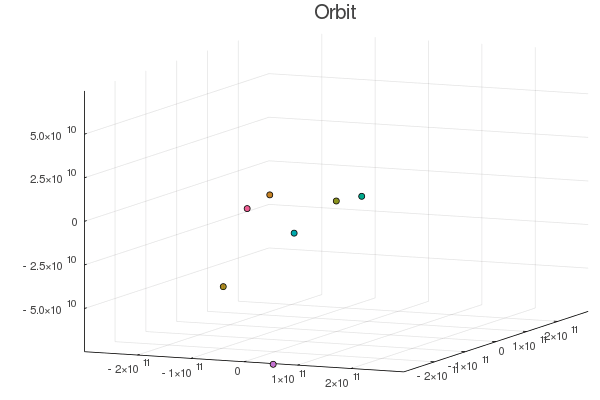

In [91]:
n = length(bodies)
plt = Plots.plot3d(
    n,
    xlim = (-2*au, 2*au),
    ylim = (-2*au, 2*au),
    zlim = (-0.5*au, 0.5*au),
    title = "Orbit",
    marker = :circle,
    legend = false,
    #linetype = :scatter3d
)

anim = Plots.@animate for i=1:20*day:3000*day
    r = NBodySimulator.get_position(simresult, i)
    push!(plt, rotl90(r)[1:n], rotl90(r)[n+1:2*n], rotl90(r)[2*n+1:3*n])
end
Plots.gif(anim, "inner.gif", fps = 30)

┌ Info: Saved animation to 
│   fn = /Users/jason/workspace/space-simulator/outer.gif
└ @ Plots /Users/jason/.julia/packages/Plots/cc8wh/src/animation.jl:98


Plots.AnimatedGif("/Users/jason/workspace/space-simulator/outer.gif")
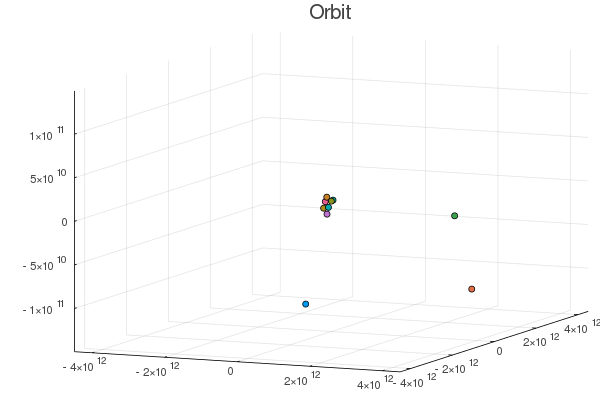

In [92]:
n = length(bodies)
plt = Plots.plot3d(
    n,
    xlim = (-30*au, 30*au),
    ylim = (-30*au, 30*au),
    zlim = (-1*au, 1*au),
    title = "Orbit",
    marker = :circle,
    legend = false,
    #linetype = :scatter3d
)

anim = Plots.@animate for i=1:30*day:3000*day
    r = NBodySimulator.get_position(simresult, i)
    push!(plt, rotl90(r)[1:n], rotl90(r)[n+1:2*n], rotl90(r)[2*n+1:3*n])
end
Plots.gif(anim, "outer.gif", fps = 30)

┌ Info: Saved animation to 
│   fn = /Users/jason/workspace/space-simulator/anim_fps30.gif
└ @ Plots /Users/jason/.julia/packages/Plots/cc8wh/src/animation.jl:98


Plots.AnimatedGif("/Users/jason/workspace/space-simulator/anim_fps30.gif")
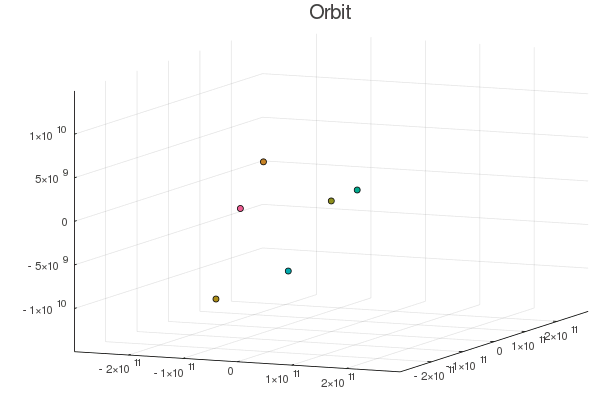

In [93]:
n = length(bodies)
anim = Plots.Animation()

for i=1:3*day:3000*day
    r = NBodySimulator.get_position(simresult, i)
    plt = Plots.plot3d(
        n,
        x = rotl90(r)[1:n],
        y = rotl90(r)[n+1:2*n],
        z = rotl90(r)[2*n+1:3*n],
        xlim = (-2*au, 2*au),
        ylim = (-2*au, 2*au),
        zlim = (-0.1*au, 0.1*au),
        title = "Orbit",
        marker = :circle,
        legend = false,
        #linetype = :scatter3d
    )
    push!(plt, rotl90(r)[1:n], rotl90(r)[n+1:2*n], rotl90(r)[2*n+1:3*n])
    Plots.frame(anim, plt)
end
Plots.gif(anim, "anim_fps30.gif", fps = 30)